<a href="https://colab.research.google.com/github/tossy0130/2026-lightgbm-/blob/main/%E6%A0%AA%E4%BE%A1%E4%BA%88%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/2026_【Python×株価分析】株価データを取得・加工・可視化して時系列分析！最終的にAIモデル/train.csv")
df_test_base = pd.read_csv("/content/drive/MyDrive/2026_【Python×株価分析】株価データを取得・加工・可視化して時系列分析！最終的にAIモデル/test.csv")
df_submit = pd.read_csv("/content/drive/MyDrive/2026_【Python×株価分析】株価データを取得・加工・可視化して時系列分析！最終的にAIモデル/sample_submission.csv", header=None, names=["Date", "Up"])

df_submit




,Date,Up
0,2012-01-26,0
1,2012-02-09,0
2,2012-02-24,0
3,2012-03-09,0
4,2012-03-23,0
...,...,...
195,2019-10-25,0
196,2019-11-08,0
197,2019-11-22,0
198,2019-12-09,0


<Axes: >

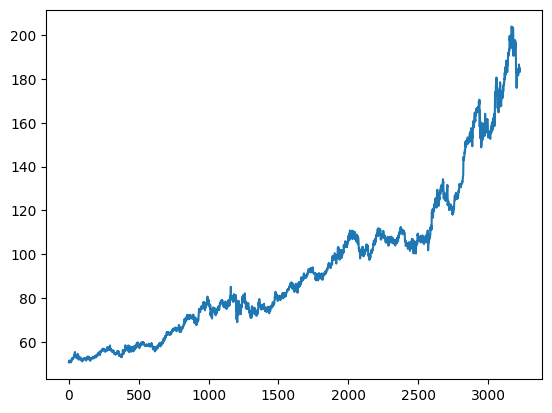

In [ ]:
pd.concat([df["Close"], df_test_base["Close"]], axis=0).reset_index(drop=True).plot()

In [ ]:
# 差分計算 , 1日前との差分
df["Close"].diff(1)

,Close
0,NaN
1,0.07
2,0.36
3,0.36
4,-0.23
...,...
2021,-0.26
2022,0.97
2023,-0.17
2024,0.30


In [ ]:
df["Close"]

,Close
0,50.72
1,50.79
2,51.15
3,51.51
4,51.28
...,...
2021,108.86
2022,109.83
2023,109.66
2024,109.96


<Axes: >

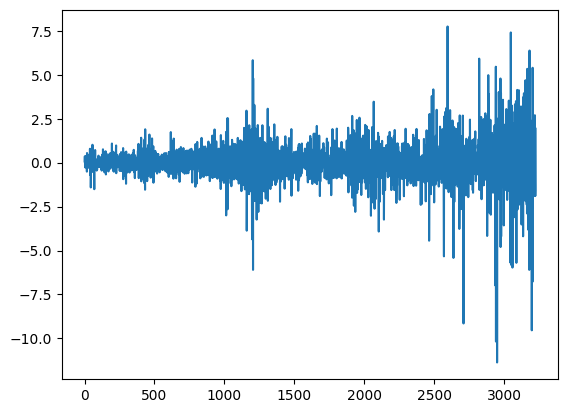

In [ ]:
pd.concat([df["Close"].diff(1), df_test_base["Close"].diff(1)] , axis=0).reset_index(drop=True).plot()

In [ ]:
pd.concat([df, df["Close"].diff(1).rename("Close_diff")], axis=1)

,Date,Open,High,Low,Close,Up,Close_diff
0,2004-01-02,50.85,50.91,50.62,50.72,1,NaN
1,2004-01-05,50.75,50.84,50.61,50.79,1,0.07
2,2004-01-06,50.87,51.26,50.86,51.15,1,0.36
3,2004-01-07,51.45,51.54,51.29,51.51,0,0.36
4,2004-01-08,51.15,51.33,51.02,51.28,0,-0.23
...,...,...,...,...,...,...,...
2021,2012-01-11,108.62,109.00,108.41,108.86,1,-0.26
2022,2012-01-12,109.68,109.90,109.44,109.83,0,0.97
2023,2012-01-13,109.53,109.72,109.08,109.66,1,-0.17
2024,2012-01-17,109.99,110.47,109.57,109.96,1,0.30


In [ ]:
def data_pre(df, col):
  df = pd.concat([df, df[col].diff(1).rename(f"{col}_diff"), df[col].diff(1).shift(1).rename(f"{col}_diff_1daylag"), df[col].diff(1).shift(2).rename(f"{col}_diff_2daylag"), df[col].diff(1).shift(3).rename(f"{col}_diff_3daylag"), df[col].diff(1).shift(4).rename(f"{col}_diff_4daylag"), df[col].diff(1).shift(5).rename(f"{col}_diff_5daylag")], axis=1)
  df = df.drop(col, axis=1)

  return df

In [ ]:
df_tmp = data_pre(df, "Close")
df_tmp

,Date,Open,High,Low,Up,Close_diff,Close_diff_1daylag,Close_diff_2daylag,Close_diff_3daylag,Close_diff_4daylag,Close_diff_5daylag
0,2004-01-02,50.85,50.91,50.62,1,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-01-05,50.75,50.84,50.61,1,0.07,NaN,NaN,NaN,NaN,NaN
2,2004-01-06,50.87,51.26,50.86,1,0.36,0.07,NaN,NaN,NaN,NaN
3,2004-01-07,51.45,51.54,51.29,0,0.36,0.36,0.07,NaN,NaN,NaN
4,2004-01-08,51.15,51.33,51.02,0,-0.23,0.36,0.36,0.07,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021,2012-01-11,108.62,109.00,108.41,1,-0.26,-0.43,-0.31,0.60,2.07,-1.21
2022,2012-01-12,109.68,109.90,109.44,0,0.97,-0.26,-0.43,-0.31,0.60,2.07
2023,2012-01-13,109.53,109.72,109.08,1,-0.17,0.97,-0.26,-0.43,-0.31,0.60
2024,2012-01-17,109.99,110.47,109.57,1,0.30,-0.17,0.97,-0.26,-0.43,-0.31


In [ ]:
df_tmp = data_pre(df_tmp, "Open")
df_tmp

,Date,High,Low,Up,Close_diff,Close_diff_1daylag,Close_diff_2daylag,Close_diff_3daylag,Close_diff_4daylag,Close_diff_5daylag,Open_diff,Open_diff_1daylag,Open_diff_2daylag,Open_diff_3daylag,Open_diff_4daylag,Open_diff_5daylag
0,2004-01-02,50.91,50.62,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-01-05,50.84,50.61,1,0.07,NaN,NaN,NaN,NaN,NaN,-0.10,NaN,NaN,NaN,NaN,NaN
2,2004-01-06,51.26,50.86,1,0.36,0.07,NaN,NaN,NaN,NaN,0.12,-0.10,NaN,NaN,NaN,NaN
3,2004-01-07,51.54,51.29,0,0.36,0.36,0.07,NaN,NaN,NaN,0.58,0.12,-0.10,NaN,NaN,NaN
4,2004-01-08,51.33,51.02,0,-0.23,0.36,0.36,0.07,NaN,NaN,-0.30,0.58,0.12,-0.10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,2012-01-11,109.00,108.41,1,-0.26,-0.43,-0.31,0.60,2.07,-1.21,-0.92,-0.97,1.05,0.48,2.01,-3.37
2022,2012-01-12,109.90,109.44,0,0.97,-0.26,-0.43,-0.31,0.60,2.07,1.06,-0.92,-0.97,1.05,0.48,2.01
2023,2012-01-13,109.72,109.08,1,-0.17,0.97,-0.26,-0.43,-0.31,0.60,-0.15,1.06,-0.92,-0.97,1.05,0.48
2024,2012-01-17,110.47,109.57,1,0.30,-0.17,0.97,-0.26,-0.43,-0.31,0.46,-0.15,1.06,-0.92,-0.97,1.05


In [ ]:
### 学習データへの特徴量追加
df = df.drop("Date", axis=1)
df = data_pre(df, "Open")
df = data_pre(df, "High")
df = data_pre(df, "Low")
df = data_pre(df, "Close")

### テストデータへの特徴量追加
df_test = df_test_base.drop("Date", axis=1)
df_test = data_pre(df_test, "Open")
df_test = data_pre(df_test, "High")
df_test = data_pre(df_test, "Low")
df_test = data_pre(df_test, "Close")



In [ ]:
### モデル構築

# 80, 20 に分ける
df_train, df_val = train_test_split(df, test_size="0.2)

col = "Up"
train_y = df_train[col] # 目的変数
train_x = df_train.drop(col, axis=1) # 説明変数

# 検証データ
val_y = df_val[col] # 目的変数
val_x = df_val.drop(col, axis=1) # 説明変数

# LightGBM 用 データセット作成
trains = lgb.Dataset(train_x, train_y)
valids = lgb.Dataset(val_x, val_y)

# パラメータセット
params = {
    'objective': 'binary',
    'metric': 'binary_logloss'
}

### モデル学習
#　num_boost_round=1000 =>　学習を回す回数  , stopping_rounds => 精度が向上していなかったら、途中で回すのをやめる。
model = lgb.train(params, trains, valid_sets=valids, num_boost_round=1000, callbacks=[lgb.early_stopping(stopping_rounds=100)])


[LightGBM] [Info] Number of positive: 839, number of negative: 781
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000710 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 1620, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.517901 -> initscore=0.071636
[LightGBM] [Info] Start training from score 0.071636
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.664438


In [ ]:
### 実行
# テストデータ
predict = model.predict(df_test)

In [ ]:
from math import ulp
### 閾値判定
threshold = 0.5 # 閾値

predict_list = []
for i in predict :
  if i >= threshold:
    Up = 1
  else:
    Up = 0
  predict_list.append(Up)

# 値結合
df_predict = pd.concat([df_test_base, pd.Series(predict_list).rename("Up")], axis=1)



In [ ]:
df_submit = pd.merge(df_submit["Date"], df_predict[["Date", "Up"]], on="Date", how="left")

In [ ]:
df_submit.to_csv("submit.csv", header=False, index=False)